/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/trex.png


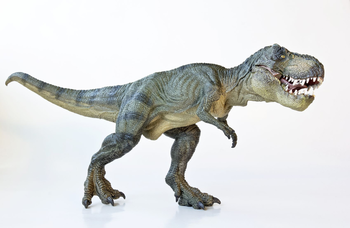

(228, 350, 3)

In [1]:
# USAGE
# python arithmetic.py --image ../images/trex.png
import os
import argparse
import pathlib
from typing import Union, Any

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(f"{globals()['_dh'][0]}")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(f"{current_folder.parent}/images/trex.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))


image.shape


max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


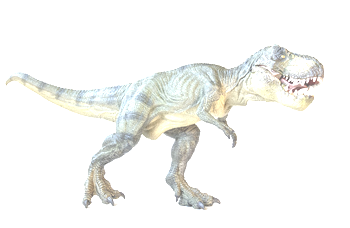

(228, 350, 3)

In [2]:
# Images are NumPy arrays, stored as unsigned 8 bit integers.
# What does this mean? It means that the values of our pixels
# will be in the range [0, 255]. When using functions like
# cv2.add and cv2.subtract, values will be clipped to this
# range, even if the added or subtracted values fall outside
# the range of [0, 255]. Check out an example:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))

# NOTE: If you use NumPy arithmetic operations on these arrays,
# the values will be modulos (wrap around) instead of being
# clipped to the [0, 255] arrange. This is important to keep
# in mind when working with images.
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

# Let's increase the intensity of all pixels in our image
# by 100. We accomplish this by constructing a NumPy array
# that is the same size of our matrix (filled with ones)
# and the multiplying it by 100 to create an array filled
# with 100's. Then we simply add the images together. Notice
# how the image is "brighter".
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)




# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(added, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))


added.shape


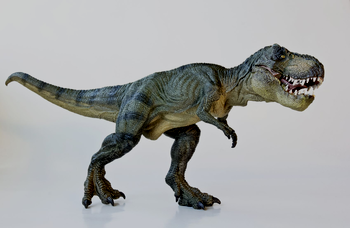

(228, 350, 3)

In [4]:
# Similarly, we can subtract 50 from all pixels in our
# image and make it darker:
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB) # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))


subtracted.shape